# <center> **Titanic**

# **Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


import functions
import importlib

import warnings

importlib.reload(functions)

<module 'functions' from 'c:\\Users\\Dell\\Documents\\AI\\Titanic\\Notebooks\\functions.py'>

# **Display Parameters**

## **Display Features**

In [2]:
%matplotlib inline

pd.options.display.max_rows = 300000
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 500

warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore", category=FutureWarning)

## **Colors**

In [3]:
color_1 = "bisque"
color_2 = "crimson"
color_3 = "orangered"
color_4 = "lightcoral"
color_5 = "royalblue"
color_6 = "pink"
color_7 = "indianred"
color_8 = "slategrey"
color_9 = "salmon"
color_10 = "beige"
color_11 = "coral"
color_13 = "grey"
color_14 = "tan"
color_15 = "wheat"
color_16 = "tomato"

## **Figure Parameters**

In [4]:
size = 20

params = {
    "font.family": "Times New Roman",
    "font.size": size,
    "axes.labelsize": size,
    "xtick.labelsize": size * 0.75,
    "ytick.labelsize": size * 0.75,
    "figure.titlesize": size * 1.5,
    "axes.titlesize": size * 1.5,
    "axes.titlepad": size,
    "axes.labelpad": size - 10,
    "lines.linewidth": 2,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.spines.left": False,
    "axes.spines.bottom": False,
    "legend.fontsize": size,
    "figure.figsize": (10, 6),
}

# **Data Loading**

In [5]:
train = pd.read_csv(
    r"C:\Users\Dell\Documents\AI\Titanic\Data\train.csv",
    index_col=False
)

test = pd.read_csv(
    r"C:\Users\Dell\Documents\AI\Titanic\Data\test.csv",
    index_col=False
)

random_state = 101
target = 'Transported'

In [17]:
train.head()

,PassengerId,Group,GroupSize,LoneTraveler,HomePlanet,CryoSleep,CabinDeck,CabinNumber,CabinSide,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,AmountSpent,Spent,Transported,FirstName,LastName
0,0001_01,1,1,1,Europa,False,B,0.0,P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0,False,Maham,Ofracculy
1,0002_01,2,1,1,Earth,False,F,0.0,S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,736.0,1,True,Juanna,Vines
2,0003_01,3,2,0,Europa,False,A,0.0,S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,10383.0,1,False,Altark,Susent
3,0003_02,3,2,0,Europa,False,A,0.0,S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,5176.0,1,False,Solam,Susent
4,0004_01,4,1,1,Earth,False,F,1.0,S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1091.0,1,True,Willy,Santantines


# **Exploratory Data Analysis**

## **Target Disbribution**

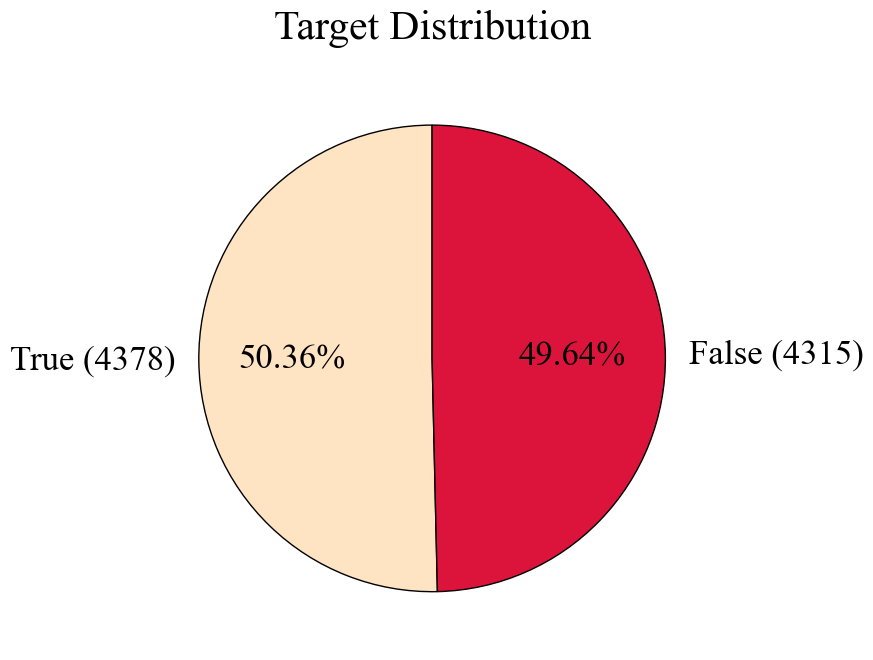

In [6]:
plt.rcParams.update(params)

fig, axes = plt.subplots(1, 1, figsize=(20, 7))

data = train['Transported'].value_counts()
colors = [color_1, color_2]
labels = [f'True ({data[True]})', f'False ({data[False]})']

axes.set_title("Target Distribution", fontsize=size * 1.5, pad=size)
axes.pie(
    data,
    colors=colors,
    labels=labels,
    startangle=90,
    autopct="%0.2f%%",
    wedgeprops={"edgecolor": "black"},
    textprops={"fontsize": size + 5},
)

plt.tight_layout()

plt.show()

## **Transported by Home Planet and Destination Planet**

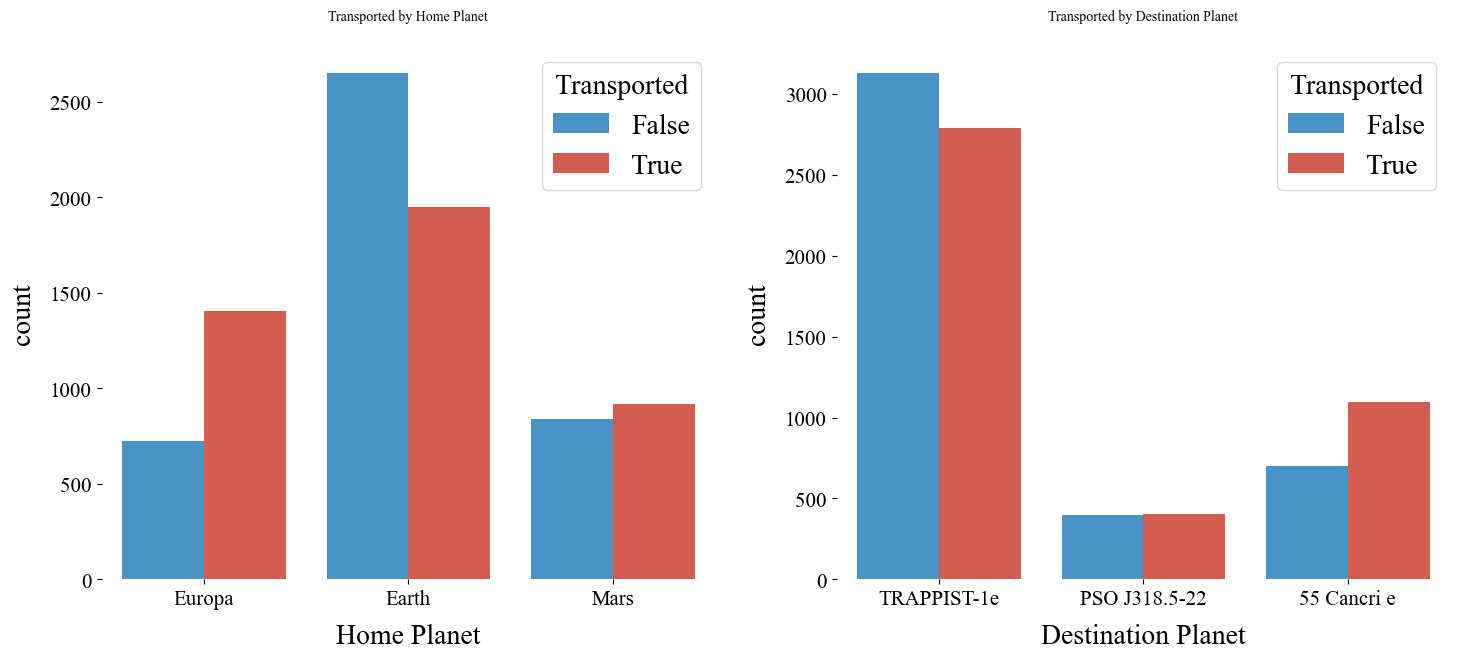

In [31]:

fig, ax = plt.subplots(1, 2, figsize=(15, 7))  # Two plots side by side


sns.countplot(
    ax=ax[0],  # Use the first subplot
    x="HomePlanet",
    hue="Transported",
    data=train,
    palette=[color_1, color_2]
)
ax[0].set_xlabel("Home Planet")
ax[0].set_title("Transported by Home Planet", fontsize=size)
ax[0].legend(title='Transported', loc='upper right')


sns.countplot(
    ax=ax[1], 
    x="Destination",
    hue="Transported",
    data=train,
    palette=[color_1, color_2]
)
ax[1].set_xlabel("Destination Planet")
ax[1].set_title("Transported by Destination Planet", fontsize=size)
ax[1].legend(title='Transported', loc='upper right')

plt.tight_layout()

plt.show()


## **Transported by Lone Traveler and VIP Passenger**

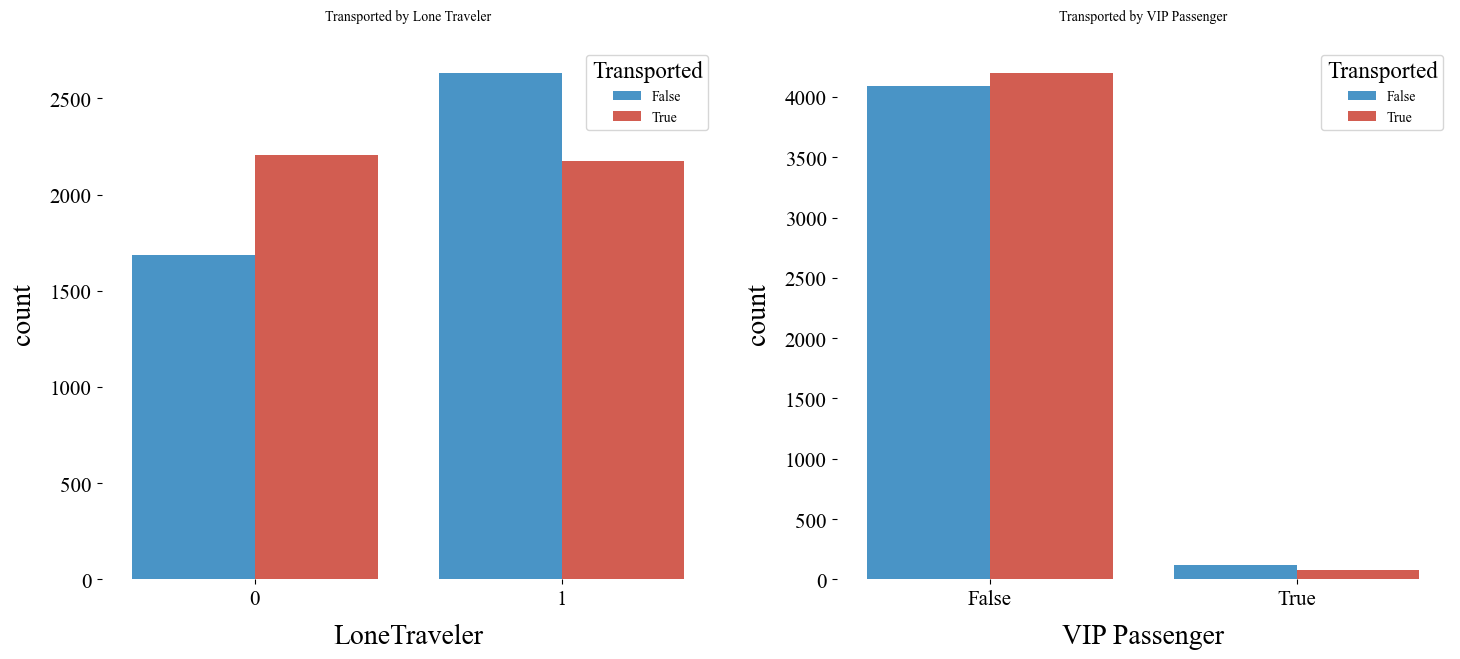

In [29]:

fig, ax = plt.subplots(1, 2, figsize=(15, 7))  # Two plots side by side


sns.countplot(
    ax=ax[0],  # Use the first subplot
    x="LoneTraveler",
    hue="Transported",
    data=train,
    palette=[color_1, color_2]
)
ax[0].set_xlabel("LoneTraveler")
ax[0].set_title("Transported by Lone Traveler", fontsize=size)
ax[0].legend(title='Transported', title_fontsize='small', loc='upper right', fontsize = 10)


sns.countplot(
    ax=ax[1], 
    x="VIP",
    hue="Transported",
    data=train,
    palette=[color_1, color_2]
)

ax[1].set_xlabel("VIP Passenger")
ax[1].set_title("Transported by VIP Passenger", fontsize=size)
ax[1].legend(title='Transported', title_fontsize='small', loc='upper right', fontsize = 10)

plt.tight_layout()

plt.show()


## **Transported by Total Spending and Cryosleep**

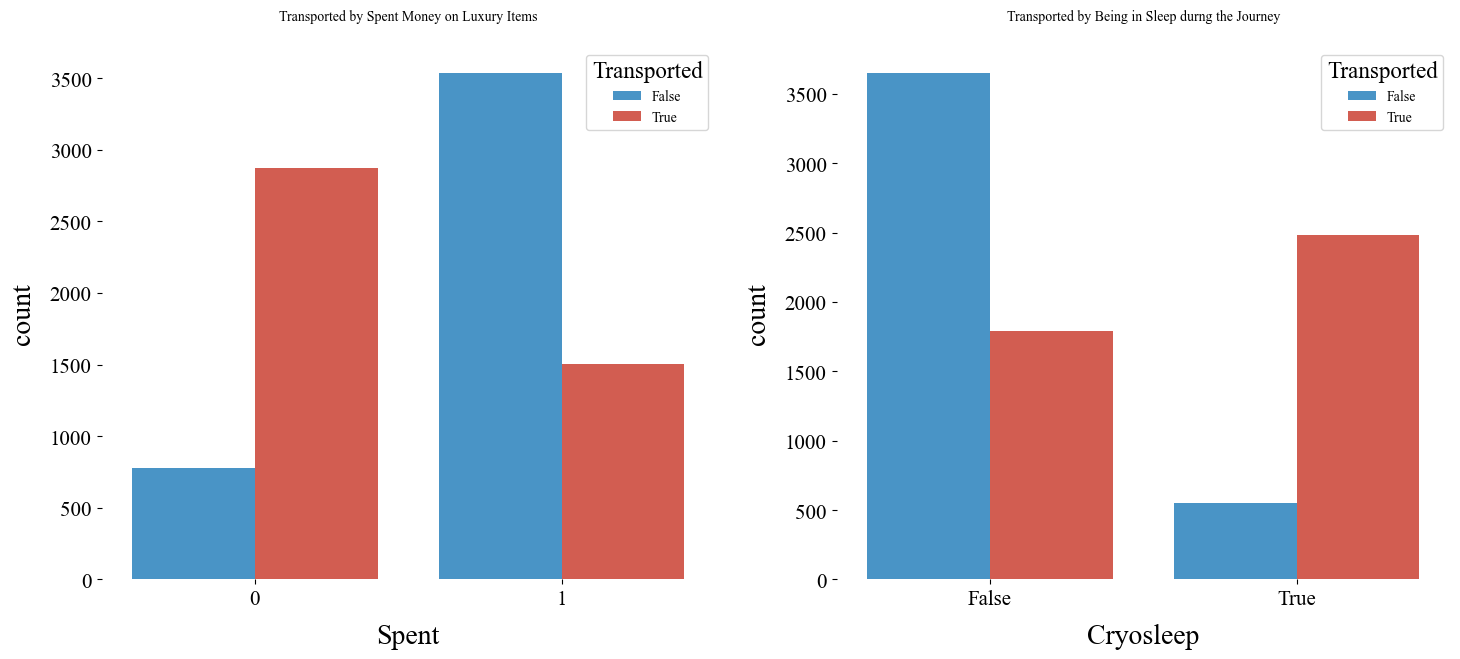

In [34]:

fig, ax = plt.subplots(1, 2, figsize=(15, 7))  # Two plots side by side


sns.countplot(
    ax=ax[0],  
    x="Spent",
    hue="Transported",
    data=train,
    palette=[color_1, color_2]
)
ax[0].set_xlabel("Spent")
ax[0].set_title("Transported by Spent Money on Luxury Items", fontsize=size)
ax[0].legend(title='Transported', title_fontsize='small', loc='upper right', fontsize = 10)


sns.countplot(
    ax=ax[1], 
    x="CryoSleep",
    hue="Transported",
    data=train,
    palette=[color_1, color_2]
)

ax[1].set_xlabel("Cryosleep")
ax[1].set_title("Transported by Being in Sleep durng the Journey", fontsize=size)
ax[1].legend(title='Transported', title_fontsize='small', loc='upper right', fontsize = 10)

plt.tight_layout()

plt.show()
